In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

In [9]:
#Reading in the Churn Dataset:

churn = pd.read_csv('/Users/dunnzy22/Desktop/Churn.csv')
pd.set_option('display.max_columns', None)
churn = churn.drop('Unnamed: 0', axis = 1)
churn.head()

,Referred_a_Friend,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Regular_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Gender,Age,Married,Number_of_Dependents,Zip_Code,Population,CLTV,Churn_Category,Total_Customer_Svc_Requests,Product/Service_Issues_Reported,Customer_Satisfaction,Churn_Value
0,1,1,25,3.0,1,19.76,0,1,1.0,13,0,1,1,0,1,1,0,0,3,1,1,102.440,2514.50,13.43,327.0,494.00,2,78,1,1,90303,27778,5337,2.0,1,1,1,1
1,1,1,37,3.0,1,6.33,1,1,2.0,15,0,0,0,0,0,0,0,0,3,1,1,79.560,2868.15,0.00,430.0,234.21,2,80,1,1,90602,26265,2793,3.0,1,0,1,1
2,0,0,27,3.0,1,3.33,1,1,1.0,20,0,0,1,0,0,0,0,0,3,1,1,81.172,2135.50,0.00,427.0,89.91,2,72,0,1,90660,63288,4638,1.0,0,0,1,1
3,1,1,1,5.0,1,15.28,0,1,2.0,33,0,0,0,0,0,0,0,0,3,1,3,73.268,70.45,0.00,0.0,15.28,2,76,1,2,90720,21343,3964,5.0,7,0,1,1
4,1,6,58,2.0,0,0.00,0,1,2.0,26,0,1,1,0,0,1,0,0,3,1,1,47.112,2651.20,40.95,689.0,0.00,1,66,1,0,91024,10558,5444,2.0,2,1,1,1


In [16]:
#Selecting all of our features for x.
#Selecting our explanatory variable, which is Churn_Value.

X = churn.iloc[:, 0:37] 
y = churn.iloc[:, -1]

mms = MinMaxScaler()

X_Minmax = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_Minmax, y, train_size=0.8, stratify=y, random_state=0)



[[0.         0.         0.25352113 ... 0.22222222 0.         0.        ]
 [1.         0.45454545 1.         ... 0.33333333 0.16666667 0.        ]
 [1.         0.27272727 0.61971831 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.43661972 ... 0.         0.         0.        ]
 [0.         0.         0.28169014 ... 0.         0.         0.        ]
 [0.         0.         0.11267606 ... 0.33333333 0.         0.        ]]


1.0


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

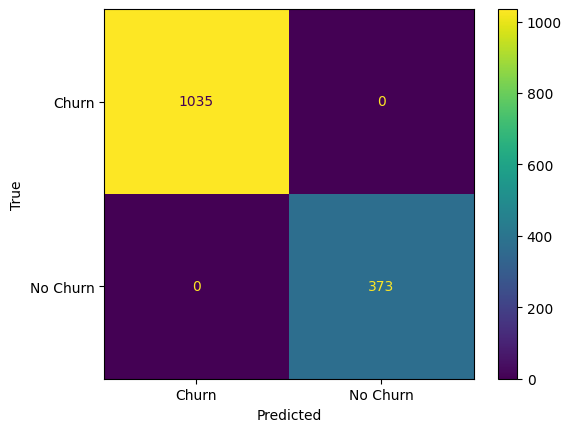

In [19]:
#Predict Churn using Random Forests with default parameters:

clf = RandomForestClassifier() 
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)


print(accuracy_score(y_test,y_pred))
f1_score(y_test, y_pred)

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['Churn', 'No Churn'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

1.0
1.0


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

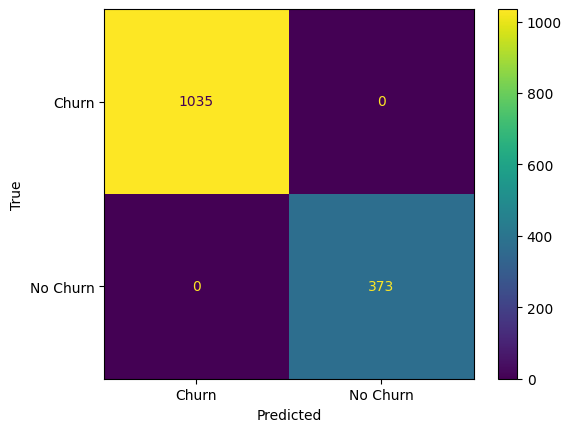

In [20]:
#Predict Churn using Random Forest with bootstrapping and our out-of-bag score

clf = RandomForestClassifier(bootstrap=True, oob_score=True) #Make sure oob_score = True for out-of-bag score to show up
clf.fit(X_train, y_train)
y_pred =clf.predict(X_test)

print(clf.oob_score_)
print(accuracy_score(y_test,y_pred))
f1_score(y_test, y_pred)

cf_matrix = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=['Churn', 'No Churn'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')